In [2]:
# importing important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston # loading the boston dataset from sklearn.datasets

In [30]:
# loading the boston columns and values from the dataset
boston=load_boston()
data=boston.data
boston_column=boston.feature_names
target=boston.target

In [19]:
# Description of the boston dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [155]:
df=pd.DataFrame(data,columns=boston_column)
target=pd.DataFrame(target,columns=['medv'])

In [156]:
# first 5 rows of the boston dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# first 5 row of the target dataset
target.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [41]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


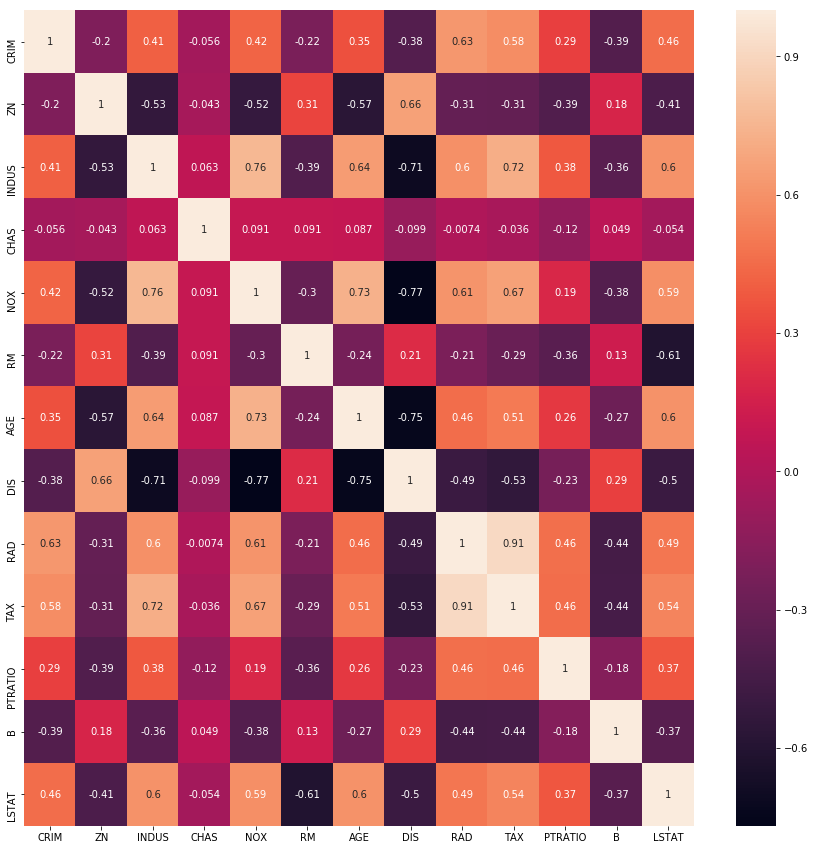

In [144]:
# checking the columns corelationship of the boston dataset
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [49]:
x=df
y=target

In [139]:
# splitting the dataset into test and train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [140]:
reg=LinearRegression()

In [141]:
# fitting the best fit line for the training dataset
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
# intercept value of the best fit line 
print("intercept : ",reg.intercept_)

intercept :  45.1925153883839


In [189]:
# slope values of the best fit line
pd.DataFrame(reg.coef_,x.columns,columns=['coef'])

,coef
CRIM,-0.114429
ZN,0.057130
INDUS,0.038300
CHAS,2.428546
NOX,-21.232624
RM,2.877234
AGE,0.006911
DIS,-1.471583
RAD,0.305784
TAX,-0.010675


In [142]:
# predicting the test values 
y_pred=reg.predict(x_test)

In [143]:
print('r2_score :',r2_score(y_test,y_pred))

r2_score : 0.7789410172622865


In [102]:
print('mean_squared_error :', mean_squared_error(y_test,y_pred) )

mean_squared_error : 21.897765396049422
